In [1]:
from pipelines import preprocessor, preprocessor2

In [2]:
from preprocess import separate, extra_features

In [3]:
data=pd.read_csv("Datasets/train.csv")

<IPython.core.display.Javascript object>

In [4]:
data.shape

(18506, 21)

In [5]:
data=extra_features(data)

In [6]:
data.shape

(18506, 25)

In [7]:
separate(data)

Target Column: ['cost_category']

Numerical Columns: ['night_mainland', 'night_zanzibar', 'total_nights']

Categorical Columns: ['age_group', 'travel_with', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz', 'trip_length', 'group_size']

Text Columns: ['Tour_ID', 'country', 'purpose', 'main_activity', 'info_source']


In [8]:
data=data.drop(columns=['Tour_ID','trip_length', 'total_male', 'total_nights', 'total_female', 'group_size'])
data.shape

(18506, 19)

In [9]:
data.main_activity.unique()

array(['Beach Tourism', 'Wildlife Tourism', 'Cultural Tourism',
       'Bird Tourism', 'Hunting Tourism', 'Conference Tourism',
       'Mountain Climbing', 'Business', 'Diving and Sport Fishing'],
      dtype=object)

In [10]:
X=preprocessor(data)
X.shape

(18506, 186)

In [11]:
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
y=data['cost_category']
y.shape

(18506,)

In [13]:
le=LabelEncoder()
y=le.fit_transform(y)
y

<IPython.core.display.Javascript object>

array([0, 0, 1, ..., 1, 1, 3])

In [14]:
y.shape

(18506,)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, shuffle=True)

from sklearn.svm import SVC
cl=SVC(gamma='auto')
cl.fit(X_train, y_train)

SVC(gamma='auto')

In [16]:
y_pred=cl.predict(X_test)

In [17]:
scores= cross_val_score(cl, X_train,y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.5518751424965241

In [18]:
from sklearn.metrics import f1_score, classification_report

print("F1_SCORE: ", f1_score(y_pred, y_test, average=None))

F1_SCORE:  [0.41006524 0.67779839 0.         0.         0.57295137 0.56642016]


In [19]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1065
           1       0.74      0.63      0.68      1748
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.56      0.58      0.57       739
           5       0.63      0.52      0.57      2000

    accuracy                           0.54      5552
   macro avg       0.39      0.36      0.37      5552
weighted avg       0.61      0.54      0.57      5552



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

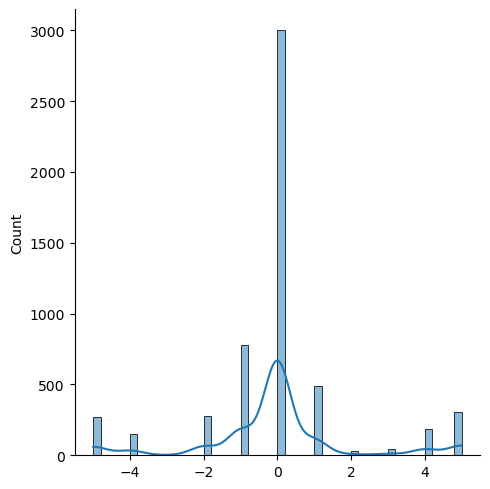

In [22]:
sns.displot((y_test-y_pred), kde=True, bins=50);

<IPython.core.display.Javascript object>

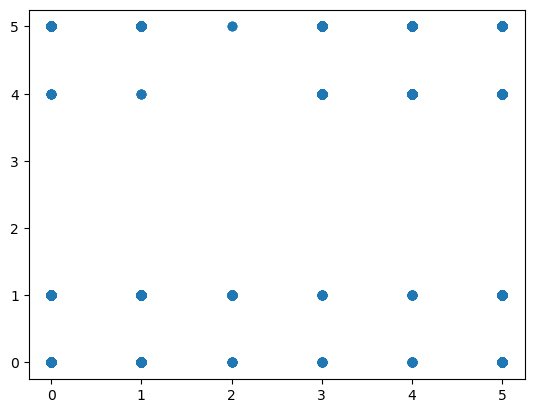

In [24]:
plt.scatter(y_test, y_pred)

In [28]:
from xgboost import XGBClassifier

xg=XGBClassifier(n_estimators=100,
                 max_depth= 8,
                 learning_rate=0.1,
                )
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [29]:
y_pred=xg.predict(X_test)

In [30]:
scores=cross_val_score(xg, X_train, y_train, cv=10)
scores.mean()

<IPython.core.display.Javascript object>

0.5714835073168406

In [31]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.37      0.49      0.42       820
           1       0.75      0.64      0.69      1731
           2       0.03      0.12      0.05        25
           3       0.03      0.26      0.06        62
           4       0.63      0.59      0.61       823
           5       0.68      0.54      0.60      2091

    accuracy                           0.57      5552
   macro avg       0.42      0.44      0.40      5552
weighted avg       0.64      0.57      0.60      5552



<IPython.core.display.Javascript object>

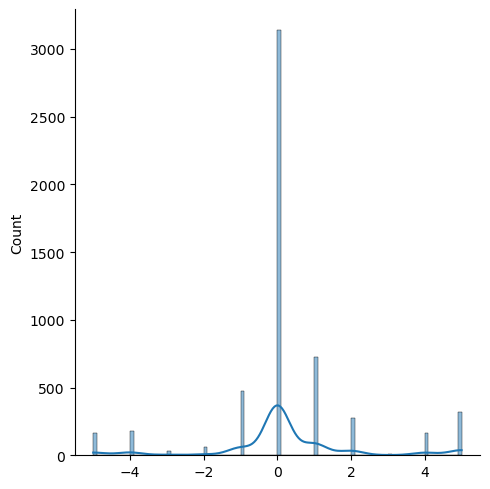

In [33]:
sns.displot((y_pred-y_test), kde=True, bins=(100));

<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


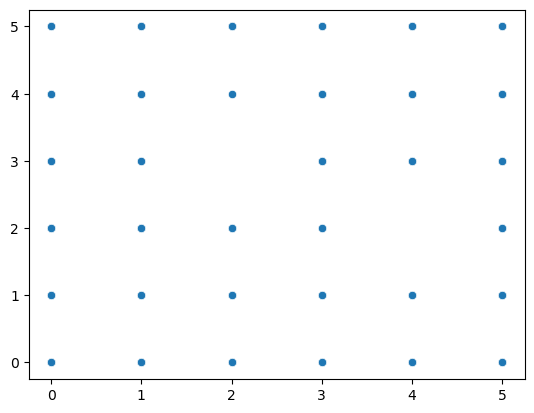

In [34]:
sns.scatterplot(y_test, y_pred);

In [37]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High Cost': 0, 'Higher Cost': 1, 'Highest Cost': 2, 'Low Cost': 3, 'Lower Cost': 4, 'Normal Cost': 5}


In [38]:
len(le.classes_)

6

In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.constraints import MaxNorm 
from tensorflow.keras.optimizers import SGD

n_features=X.shape[1]
num_class=len(le.classes_)

In [43]:
model=Sequential()
model.add(Dense(32, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(32,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_class, activation='softmax'))

#compile the model
epochs=25
lrate=0.1
decay=lrate/epochs
sgd=SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                5984      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [46]:
model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=1)

Epoch 1/25
203/203 [==============================] - 4s 19ms/step - loss: 1.0522 - accuracy: 0.5946
Epoch 2/25
203/203 [==============================] - 4s 19ms/step - loss: 1.0484 - accuracy: 0.6004
Epoch 3/25
203/203 [==============================] - 4s 22ms/step - loss: 1.0469 - accuracy: 0.5985
Epoch 4/25
203/203 [==============================] - 4s 21ms/step - loss: 1.0461 - accuracy: 0.5993
Epoch 5/25
203/203 [==============================] - 4s 22ms/step - loss: 1.0481 - accuracy: 0.6020
Epoch 6/25
203/203 [==============================] - 4s 20ms/step - loss: 1.0471 - accuracy: 0.6018
Epoch 7/25
203/203 [==============================] - 4s 22ms/step - loss: 1.0434 - accuracy: 0.5991
Epoch 8/25
203/203 [==============================] - 4s 22ms/step - loss: 1.0420 - accuracy: 0.6004
Epoch 9/25
203/203 [==============================] - 4s 21ms/step - loss: 1.0415 - accuracy: 0.5994
Epoch 10/25
203/203 [==============================] - 4s 21ms/step - loss: 1.0411 - accura

In [47]:
from sklearn.metrics import accuracy_score

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {accuracy}')
print(loss)

174/174 [==============================] - 1s 5ms/step - loss: 1.1414 - accuracy: 0.5591
Test accuracy: 0.559077799320221
1.141392469406128


<IPython.core.display.Javascript object>

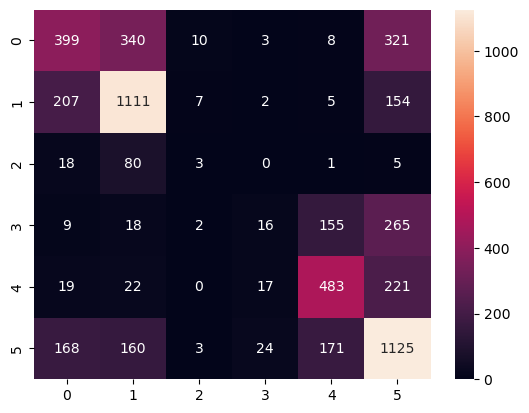

In [48]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d');

In [49]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High Cost': 0, 'Higher Cost': 1, 'Highest Cost': 2, 'Low Cost': 3, 'Lower Cost': 4, 'Normal Cost': 5}


In [14]:
from kfold import skfold

In [50]:
from scipy.stats import chi2_contingency

ct=pd.crosstab(data['tour_arrangement'] ,[data['cost_category']])#, data['night_zanzibar']])

chi2, p, dof, expected=chi2_contingency(ct)

print("Chi-squared test results:")
print("  - Chi2 score: ", chi2)
print("  - P-value: ", p)
print("  - Degrees of freedom: ", dof)
print("  - Expected frequencies: ")
expected=pd.DataFrame(expected)
expected.head(5)

<IPython.core.display.Javascript object>

Chi-squared test results:
  - Chi2 score:  8331.28442877103
  - P-value:  0.0
  - Degrees of freedom:  5
  - Expected frequencies: 


<IPython.core.display.Javascript object>

,0,1,2,3,4,5
0,1830.652653,2421.458716,178.685237,779.445909,1277.674106,2723.083378
1,1847.347347,2443.541284,180.314763,786.554091,1289.325894,2747.916622


In [51]:
ct_df=pd.DataFrame(ct)
ct_df

<IPython.core.display.Javascript object>

cost_category,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
tour_arrangement,,,,,,
Independent,935,487,11,1431,2354,3993
Package Tour,2743,4378,348,135,213,1478


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

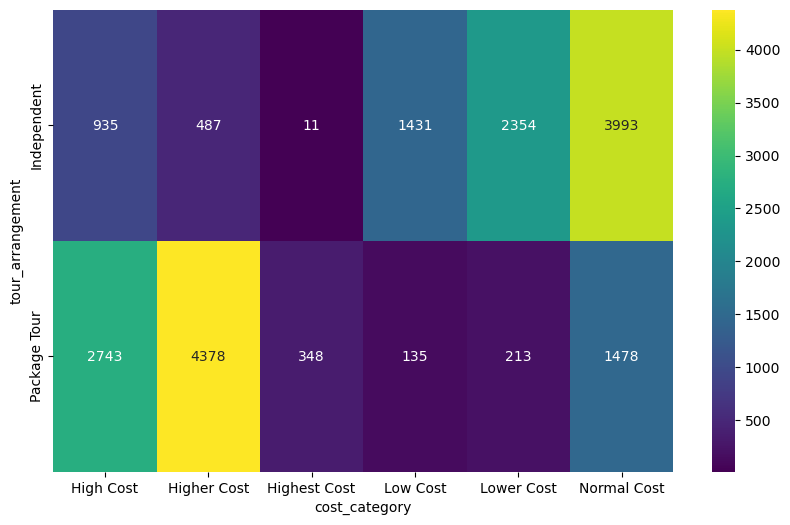

In [52]:
fig, ax=plt.subplots(figsize=(10,6))

sns.heatmap(ct, cmap='viridis', annot=True, fmt='d', ax=ax);

<IPython.core.display.Javascript object>

<AxesSubplot: >

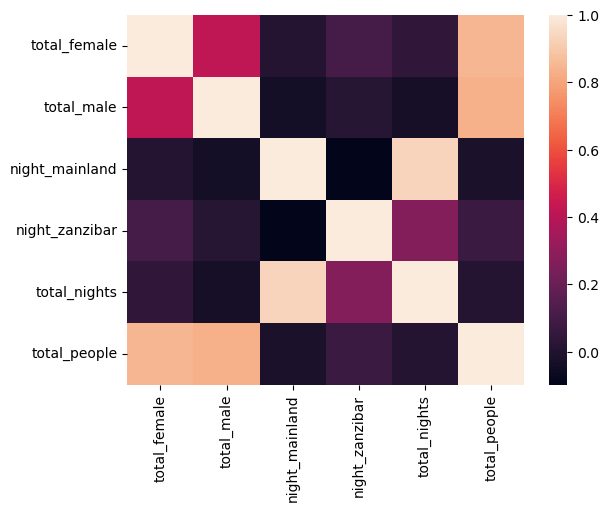

In [76]:
sns.heatmap(data.corr())

In [42]:
data.keys()

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category', 'total_nights',
       'trip_length', 'total_people', 'group_size'],
      dtype='object')

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pipe1=preprocessor(data)
pipe2=preprocessor2(data)

models={
    "Tree": DecisionTreeClassifier(),
    "Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "Lgbm": LGBMClassifier(),
    "NNN": MLPClassifier()
}

vectors={
    "Pipe1": pipe1,
    "Pipe2": pipe2
}


In [21]:
from kfold import skfold
all_models=[]

for class_model in models:
    for sample in vectors:
        all_models.append(skfold(class_model, sample, y, fold))
        print(f"Model: {class_model}_{sample}...\n")

ValueError: Found input variables with inconsistent numbers of samples: [5, 18506]

In [22]:
import numpy as np
from scipy.stats.mstats import winsorize

# Generate some random data with outliers
data = np.random.normal(0, 1, 1000)
data[950:] = 10

# Winsorize the data to handle outliers
data_winsorized = winsorize(data, limits=[0.05, 0.05])

# Print the mean and standard deviation of the original and winsorized data
print("Original mean:", np.mean(data))
print("Original std dev:", np.std(data))
print("Winsorized mean:", np.mean(data_winsorized))
print("Winsorized std dev:", np.std(data_winsorized))

Original mean: 0.5144225155448143
Original std dev: 2.3864299977631607
Winsorized mean: 0.2054066341564273
Winsorized std dev: 1.1684860787749516


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

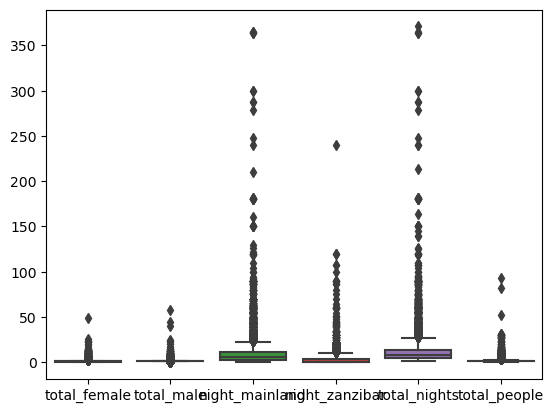

In [61]:
sns.boxplot(data=data)
plt.show();

<IPython.core.display.Javascript object>

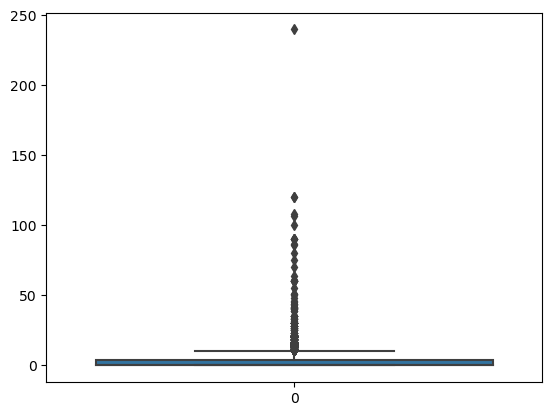

In [59]:
sns.boxplot(data=data['night_zanzibar']);

In [25]:
train=pd.read_csv('Datasets/Train (1).csv')
train.head()

<IPython.core.display.Javascript object>

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [26]:
test=pd.read_csv('Datasets/Test (1).csv')
test.head()

<IPython.core.display.Javascript object>

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [33]:
data['Tour_ID'].isin(train['ID']).sum()

0

In [35]:
train['total_cost'].max()

99532875.0

In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,4806.0,9.267582e-01,1.288242e+00,0.0,0.0,1.0,1.0,49.0
total_male,4804.0,1.009575e+00,1.138865e+00,0.0,1.0,1.0,1.0,44.0
night_mainland,4809.0,8.488043e+00,1.042762e+01,0.0,3.0,6.0,11.0,145.0
night_zanzibar,4809.0,2.304429e+00,4.227080e+00,0.0,0.0,0.0,4.0,61.0
total_cost,4809.0,8.114389e+06,1.222490e+07,49000.0,812175.0,3397875.0,9945000.0,99532875.0


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,18504.0,0.936230,1.215582,0.0,0.0,1.0,1.0,49.0
total_male,18500.0,0.998757,1.173177,0.0,1.0,1.0,1.0,58.0
night_mainland,18506.0,9.141576,14.127449,0.0,3.0,6.0,11.0,365.0
night_zanzibar,18506.0,2.493516,5.275156,0.0,0.0,0.0,4.0,240.0
total_nights,18506.0,11.635091,14.589660,1.0,5.0,8.0,14.0,371.0
total_people,18498.0,1.933398,2.006503,0.0,1.0,2.0,2.0,93.0
